In [1]:
from qiskit import IBMQ

In [2]:
try:
    IBMQ.load_account()
except:
    token = '1a97f2dc9ae67a89bf3f812ff970572a58de0c6bec9306dc411d9d4df9a7119e0f9e99b00e990f93be7fba7fb02777cef47171426c05d333c0946fa27bf23ebd'
    IBMQ.save_account(token)
    IBMQ.load_account()

/miniconda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
provider = IBMQ.get_provider(hub = 'ibm-q')
qcomp = provider.get_backend('ibmq_lima')
# qcomp = provider.get_backend('ibmq_16_melbourne')
# qcomp = provider.get_backend('ibmq_belem')

In [4]:
import qiskit.tools.jupyter
%qiskit_job_watcher
from qiskit.tools.monitor import job_monitor

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [5]:
from qiskit import QuantumRegister, QuantumCircuit, execute

circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure([0,1],[0,1])
circ.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [6]:
job = execute(circ, backend=qcomp, shots = 1000)


In [7]:
job_monitor(job)

Job Status: job has successfully run


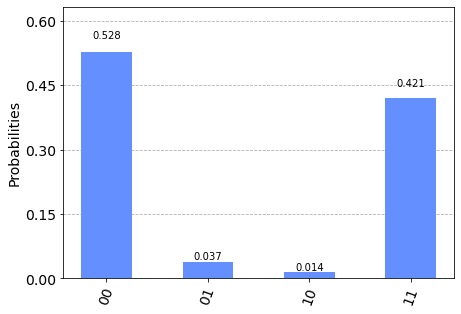

In [8]:
from qiskit.visualization import plot_histogram
%matplotlib inline

result = job.result()
plot_histogram(result.get_counts(circ))

In [9]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [12]:
qr = QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1], qr=qr)

job = execute(meas_calibs, backend=qcomp, shots = 1024, optimization_level=0)

meas_fitter = CompleteMeasFitter(job.result(), state_labels)
print(meas_fitter.cal_matrix)

[[0.984375   0.03125    0.06835938 0.00390625]
 [0.01074219 0.96582031 0.         0.08300781]
 [0.00488281 0.         0.92089844 0.03417969]
 [0.         0.00292969 0.01074219 0.87890625]]


In [13]:
job_monitor(job)

Job Status: job has successfully run


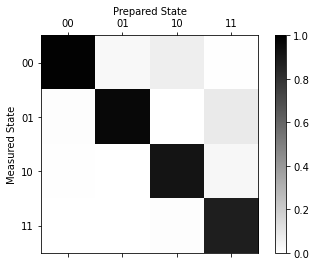

In [14]:
meas_fitter.plot_calibration()

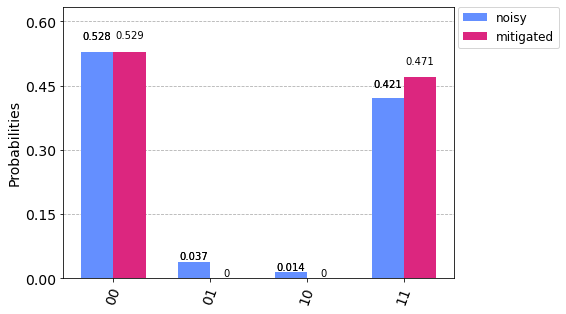

In [16]:
mf = meas_fitter.filter
mitigated_results = mf.apply(result)

device_counts = result.get_counts(circ)
mitigated_counts = mitigated_results.get_counts(circ)

plot_histogram([device_counts, mitigated_counts], legend=['noisy', 'mitigated'])